<a href="https://colab.research.google.com/github/aidot-kr/AISecurity/blob/master/5_OneHotEncode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Word Embedding

- scikit-learn을 사용한 One hot Encode 
- 참고URL: https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/

In [1]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

data = ['cold', 'cold', 'warm', 'cold', 'hot'] # 사용할 데이터 정의
values = array(data)
print(values)

# 정수 인코딩을 통해서 인덱스 생성
label_encoder = LabelEncoder() 
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)

# 인덱스를 기준으로 바이러리 인코딩
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

# 가장 큰 값을 가진 인덱스의 실제 데이터 조회
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
print(inverted)

['cold' 'cold' 'warm' 'cold' 'hot']
[0 0 2 0 1]
[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]
['cold']


- Kereas를 사용한 One-hot Encode 


https://subinium.github.io/Keras-6-1/
https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/
https://medium.com/@omicro03/%EC%9E%90%EC%97%B0%EC%96%B4%EC%B2%98%EB%A6%AC-nlp-6%EC%9D%BC%EC%B0%A8-%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%9D%98-%EB%B6%84%EB%A6%AC-%EC%A0%95%EC%88%98%EC%9D%B8%EC%BD%94%EB%94%A9-332670c73388

In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical

#samples = ['The cat sat on the mat.']
samples = ['cold', 'cold', 'warm', 'cold', 'hot']

# 가장 빈도가 높은 1,000개의 단어만 선택하도록 Tokenizer 객체를 만듭니다.
tokenizer = Tokenizer()
# 단어 인덱스를 구축합니다.
tokenizer.fit_on_texts(samples)
print('워드 인덱스:',tokenizer.word_index)
print('출현 빈도:',tokenizer.word_counts)

# 문자열을 정수 인덱스의 리스트로 변환합니다.
sequences = tokenizer.texts_to_sequences(samples)
print('정수 인덱스:',sequences)

# 원-핫 엔코딩 처리
encoded = to_categorical(sequences)
print(encoded)

워드 인덱스: {'cold': 1, 'warm': 2, 'hot': 3}
출현 빈도: OrderedDict([('cold', 3), ('warm', 1), ('hot', 1)])
정수 인덱스: [[1], [1], [2], [1], [3]]
[[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]


- Sklearn의 CountVectorizer를 활용한 Bag of Words

In [7]:
from sklearn.feature_extraction.text import CountVectorizer 
corpus = ['This is the first document.',
          'This document is the second document.',
          'And this is the third one.',
          'Is this the first document?']
vectorizer = CountVectorizer() # 텍스트 문서 모음을 토큰 수 행렬로 변환
word_vectors = vectorizer.fit_transform(corpus)  # 어휘 사전을 기반으로  document-term matrix으로 반환
print("Index:", vectorizer.vocabulary_) 
print("Features:", vectorizer.get_feature_names())
print("Values: \n", word_vectors.toarray()) 

Index: {'this': 8, 'is': 3, 'the': 6, 'first': 2, 'document': 1, 'second': 5, 'and': 0, 'third': 7, 'one': 4}
Features: ['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
Values: 
 [[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


## Bag of Words 적용, Naive Bayes
- 참고 URL) https://www.datasciencelearner.com/naive-bayes-classifier-spam-filter-example/
- https://colab.research.google.com/drive/14HcWVXEQ8OwUuNLcYWg0ZDT1RtpMVl7b#scrollTo=wN2taWylhhrw


1. 라이브러리 Import

In [8]:
import nltk #자연어 처리 패키지
from nltk.corpus import stopwords #NLTK에서 제공되는 불용어 사전
import string # Python  문자열 처리 클래스
import pandas as pd # 데이터분석 라이브러리

# 사이킷런(scikit-learn)의 model_selection 패키지 안에 train_test_split 모듈
# 손쉽게 train set(학습 데이터 셋)과 test set(테스트 셋)을 분리
from sklearn.model_selection import train_test_split 
# 여러과정의 전처리를 일괄처리
from sklearn.pipeline import Pipeline 
# 문서 집합에서 단어 토큰을 생성하고 각 단어의 수를 세어 BOW 인코딩한 벡터
from sklearn.feature_extraction.text import CountVectorizer 
# 카운트 행렬을 표준화 된 tf 또는 tf-idf 표현으로 변환
from sklearn.feature_extraction.text import TfidfTransformer
# naive_bayes 서브패키지
from sklearn.naive_bayes import MultinomialNB
# 사이킷런 성능 평가 패키지
from sklearn.metrics import classification_report,confusion_matrix

2. Dataset 다운로드 및 정제

1) 아래의 URL에서 DataSet 다운로드 가능
- https://www.kaggle.com/uciml/sms-spam-collection-dataset

In [9]:
messages = pd.read_csv('spam.csv', encoding='latin-1') # ISO-8859-1, 라틴1으로 엔코딩
messages.head(10)

FileNotFoundError: ignored

2) DataSet 컬럼 정제 (불필요한 컬럼 삭제, 컬럼명 변경)

In [ ]:
messages.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)
messages = messages.rename(columns={'v1': 'class','v2': 'text'})
messages.head(10)

,class,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


3) DataSet 탐색적 데이터 분석
- 스팸 class가 약 15%이며, 중복된 메시지도 일부 존재함

In [ ]:
messages.groupby('class').describe()

text                                                               
      count unique                                                top freq
class                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

- 메시지 길이 분석: 햄(스팸아님)은 200자 이내, 스팸은 130자 이상의 값이 다수

array([<matplotlib.axes._subplots.AxesSubplot object at 0x176b1fa10>,
      dtype=object)

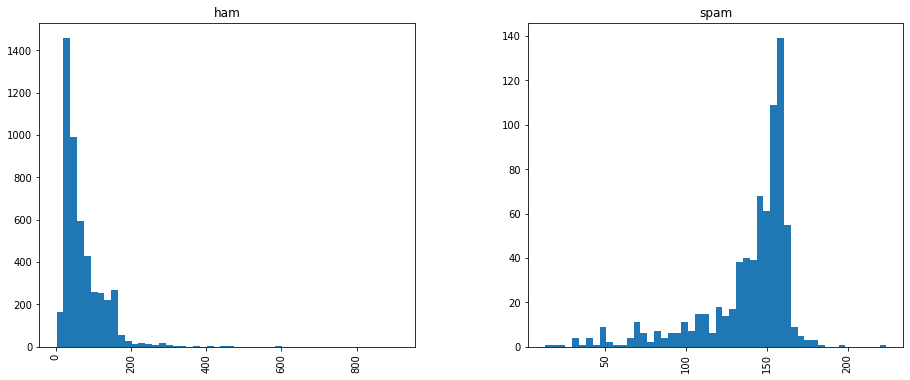

In [ ]:
messages['length'] = messages['text'].apply(len) # 각 로우의 텍스트 길이를 계산하여 length 필드에 추가함
messages.hist(column='length',by='class',bins=50, figsize=(15,6))

- 특수기호(문자구분자), 불용어, 소문자 처리 함수

In [ ]:
def process_text(text):
    #1 문자 구분자 제거
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    #2 불용어 제거
    clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    
    #3 리스트 반환
    return clean_words

In [ ]:
messages['text'].apply(process_text).head(10)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
5    [FreeMsg, Hey, darling, 3, weeks, word, back, ...
6    [Even, brother, like, speak, treat, like, aids...
7    [per, request, Melle, Melle, Oru, Minnaminungi...
8    [WINNER, valued, network, customer, selected, ...
9    [mobile, 11, months, U, R, entitled, Update, l...
Name: text, dtype: object

3) 데이터 집합을 분할하여 기능 훈련 및 테스트 데이터 생성
- train_test_split함수를 사용하여 테스트 크기가 0.2인 테스트 데이터 생성
- random_state를 사용하여 동일한 값의 테스트 데이터 생성

In [ ]:
msg_train, msg_test, class_train, class_test = train_test_split(messages['text'],messages['class'],test_size=0.2, random_state = 15)

4) 사이킷런의 CountVectorizer를 통해 피처 생성
 - 사전에 정의한 함수인 'process_text'를 사용하여 토큰을 추출함
 - 각 문서에서 토큰의 출현 빈도 계산
 - 각 문서를 BOW 인코딩 벡터로 변환한다.

In [ ]:
bow = CountVectorizer(analyzer=process_text)
train_data_features = bow.fit_transform(msg_train, class_train)
bow

CountVectorizer(analyzer=<function process_text at 0x1524ca3b0>)

In [ ]:
# 각 문서의 토큰 카운트 확인
sorted(bow.vocabulary_.items(), key=lambda x:x[1], reverse=True)

[('åÔrents', 10009),
 ('åÒIts', 10008),
 ('åÒHarry', 10007),
 ('åÐ', 10006),
 ('åÈ10', 10005),
 ('å£s', 10004),
 ('å£900', 10003),
 ('å£800', 10002),
 ('å£79', 10001),
 ('å£75000', 10000),
 ('å£750', 9999),
 ('å£71', 9998),
 ('å£600', 9997),
 ('å£6', 9996),
 ('å£5month', 9995),
 ('å£54', 9994),
 ('å£50å£500', 9993),
 ('å£50award', 9992),
 ('å£500000', 9991),
 ('å£5000', 9990),
 ('å£500', 9989),
 ('å£50', 9988),
 ('å£5', 9987),
 ('å£48', 9986),
 ('å£450', 9985),
 ('å£400', 9984),
 ('å£3wk', 9983),
 ('å£350', 9982),
 ('å£3365', 9981),
 ('å£3350', 9980),
 ('å£300', 9979),
 ('å£3', 9978),
 ('å£250', 9977),
 ('å£2000', 9976),
 ('å£200', 9975),
 ('å£1minMobsmoreLKPOBOX177HP51FL', 9974),
 ('å£1million', 9973),
 ('å£150wk', 9972),
 ('å£150pmmorefrommobile2BremovedMobyPOBox734LS27YF', 9971),
 ('å£150pm', 9970),
 ('å£150perweeksub', 9969),
 ('å£150perWKsub', 9968),
 ('å£150msg', 9967),
 ('å£150ea', 9966),
 ('å£1500', 9965),
 ('å£150', 9964),
 ('å£1450', 9963),
 ('å£1250', 9962),
 ('å£125', 9961)

In [ ]:
import numpy as np
vocab = bow.get_feature_names()
dist = np.sum(train_data_features, axis=0)

for tag, count in zip(vocab, dist):
    print(count, tag)
    
pd.DataFrame(dist, columns=vocab)

#pd.DataFrame(train_data_features[:100].toarray(), columns=vocab).head()

[[2 2 1 ... 1 1 1]] 0


,0,008704050406,0089my,01223585334,0125698789,020603,0207,02070836089,02072069400,02073162414,...,å£75000,å£79,å£800,å£900,å£s,åÈ10,åÐ,åÒHarry,åÒIts,åÔrents
0,2,2,1,1,1,3,2,1,1,2,...,3,1,6,7,1,1,2,1,1,1


5) TF-IDF(Term Frequency – Inverse Document Frequency) 인코딩
- 공통적으로 들어있는 단어의 경우 가중치를 축소

- TfidfTransformer 파라미터

- norm='l2' 각 문서의 피처 벡터에 대한 정규화 방식 결정 
 .L2 : 벡터의 각 원소의 제곱의 합이 1이 되도록 구성, 기본 값
 .L1 : 벡터의 각 원소의 절댓값의 합이 1이 되도록 크기를 조절

- smooth_idf=False 피처 생성시 0인 값에 대해 작은 값을 합한 스무딩 피처 구성여부 결정

- sublinear_tf=False TF (Term-Frequency, 단어빈도) 값의 스무딩(smoothing) 여부를 결정

- use_idf=True TF-IDF를 사용해 피처를 만들 것인지 아니면 단어 빈도 자체를 사용할 것인지 여부

In [ ]:
tfidf = TfidfTransformer()
tfidf_vector = tfidf.fit_transform(temp)
tfidf_vector


<4457x10010 sparse matrix of type '<class 'numpy.float64'>'
	with 40493 stored elements in Compressed Sparse Row format>

In [ ]:
import numpy as np
vocab = bow.get_feature_names()
dist = np.sum(tfidf_vector, axis=0)

for tag, count in zip(vocab, dist):
    print(count, tag)
    
pd.DataFrame(dist, columns=vocab)

[[0.43407075 0.52177282 0.25159911 ... 0.27854106 0.30030863 0.23368328]] 0


,0,008704050406,0089my,01223585334,0125698789,020603,0207,02070836089,02072069400,02073162414,...,å£75000,å£79,å£800,å£900,å£s,åÈ10,åÐ,åÒHarry,åÒIts,åÔrents
0,0.434071,0.521773,0.251599,0.227628,0.432018,0.849647,0.502705,0.653126,0.275191,0.609939,...,0.800168,0.333889,1.53195,1.906877,0.279844,0.46646,0.511549,0.278541,0.300309,0.233683


In [ ]:
def prun_example():
    bow = CountVectorizer(analyzer=process_text)
    bow.fit(msg_train, class_train)    

- 전체 로직의 실행시간 측정 예시(반드시 필요한 코드는 아님)
 . ncalls - 함수가 호출된 횟수.
 . tottime - 이 함수 내에서 소요된 시간(초 단위), 다른 함수를 호출하면 그 함수의 시간은 포함하지 않음. (초 단위)
 . percall - tottime을 ncalls로 나눈 값
 . cumtime - 이 함수 내에서 소요된 시간. 다른 함수를 호출할 때 그 함수 내에서 소요된 시간을 포함함. (초 단위)
 . percall - cumtime을 ncalls로 나눈 값.

In [ ]:
%prun prun_example()

## Pipeline을 사용하여 일괄처리

In [ ]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=process_text)), # 단어를 process_text 함수 처리 후 BoW전환
    ('tfidf',TfidfTransformer()), # BoW를 가중치가 부여된 TF-IDF로 변환
    ('classifier',MultinomialNB()) # TF-IDF vectors 를 베이즈정리 분류기로 학습
])

In [ ]:
%time temp= pipeline.fit(msg_train,class_train)
print(temp)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function process_text at 0x14da84710>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [ ]:
predictions = pipeline.predict(msg_test)

In [ ]:
predictions

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [ ]:
print(classification_report(class_test,predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       955
        spam       1.00      0.75      0.86       160

    accuracy                           0.96      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.96      0.96      1115



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
X = ['Tom plays soccer','Tom loves soccer and baseball','baseball is his hobby and his job']
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(X)

In [ ]:
print(tfidf_matrix.toarray())

[[0.         0.         0.         0.         0.68091856 0.51785612
  0.51785612]
 [0.45985353 0.         0.         0.60465213 0.         0.45985353
  0.45985353]
 [0.4736296  0.62276601 0.62276601 0.         0.         0.
  0.        ]]


In [ ]:
tfidf_vectorizer.vocabulary_

{'tom': 6,
 'plays': 4,
 'soccer': 5,
 'loves': 3,
 'baseball': 0,
 'hobby': 1,
 'job': 2}